# Linear Autoencoder
The most basic of all, for demonstration purposes. Let's see how it performs!

In [2]:
import torchvision
from torchvision import transforms
import torch

transform = transforms.Compose([
    # you can add other transformations in this list
    transforms.ToTensor()
])
mnist_data = torchvision.datasets.MNIST('./data', download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(mnist_data,
                                          batch_size=128,
                                          shuffle=True)

In [3]:
from models.linear_autoencoder import LinearAutoencoder
import os.path

model = LinearAutoencoder()
if os.path.isfile("checkpoints/linear_autoencoder.pth"):
    model.load_state_dict(torch.load("checkpoints/linear_autoencoder.pth"))
    print("Loaded model from checkpoint")

Loaded model from checkpoint


In [4]:
from torch.utils.tensorboard import SummaryWriter
import datetime

#writer = SummaryWriter(f'runs/linear_autoencoder/{datetime.datetime.now()}')
writer = SummaryWriter("runs/linear_autoencoder/2022-11-10 18:44:57.708776")
#use SGD optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# use loss for convuluational autoencoder
criterion = torch.nn.BCELoss()

epochs = 200000

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    # save model
    torch.save(model.state_dict(), "checkpoints/linear_autoencoder.pth")
    # write loss to tensorboard
    writer.add_scalar('training loss', running_loss / len(data_loader), epoch)

print("Done training")


KeyboardInterrupt: 

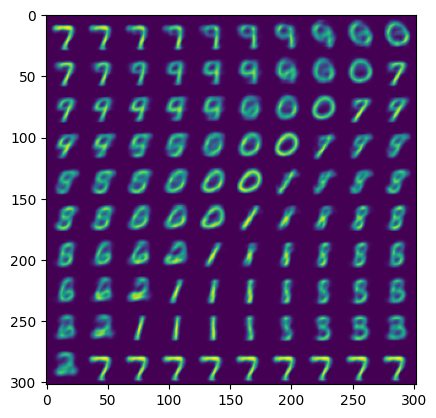

In [5]:

from torchvision.utils import make_grid
import matplotlib.pyplot as plt
interpolate = torch.zeros(100, 2)

for x in range(10):
    for y in range(10):
        interpolate[x + y * 9, 0] = x / 10
        interpolate[x + y * 9, 1] = y / 10

out = model.decoder(interpolate).view(-1, 1, 28, 28)

grid = make_grid(out, nrow=10)
plt.imshow(grid[0])